In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
train_data = pd.read_csv('train_ujjwala.csv')
label_counts = train_data['stance'].value_counts()
print(label_counts)


favour     386
neutral    328
against    284
Name: stance, dtype: int64


##sentence embedding 

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('train_ujjwala.csv')

# Pre-trained sentence embedding model
model = SentenceTransformer('sentence-transformers/paraphrase-xlm-r-multilingual-v1')

# Extract sentence embeddings for the Telugu tweets
embeddings = model.encode(df['text'].tolist())

def extract_keywords(texts):
    vectorizer = TfidfVectorizer(max_features=25)
    vectorizer.fit(texts)
    tfidf_scores = vectorizer.transform(texts)
    tfidf_scores_array = tfidf_scores.toarray()
    documents = []
    for row in tfidf_scores_array:
        document = ' '.join([str(score) for score in row])
        documents.append(document)
    return documents

keywords = extract_keywords(df['text'].tolist())

# Combine the sentence embeddings and keyword features
features = []
for i in range(len(embeddings)):
    feature = list(embeddings[i]) + list(keywords[i])
    features.append(feature)


# Encode the stance labels using label encoding
le = LabelEncoder()
df['stance_label'] = le.fit_transform(df['stance'])

df['sentence_embedding'] = df['text'].apply(lambda x: model.encode(x))

vectorizer = TfidfVectorizer()
X_keywords = vectorizer.fit_transform(df['text'])

# Combine the sentence embeddings and keyword features to create a final feature vector for each tweet
X_sentence = pd.DataFrame(df['sentence_embedding'].tolist())
X = pd.concat([X_sentence, pd.DataFrame(X_keywords.toarray())], axis=1)


##Distribution of labels

##Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X[:801], df['stance_label'][:801], test_size=0.2, random_state=42)

# Define the base classifier for bagging
base_clf = DecisionTreeClassifier()

# Define the bagging classifier
bg = BaggingClassifier(estimator=base_clf, n_estimators=10)

# Train the bagging classifier on the training set
bg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bg.predict(X[801:998])

# Evaluate the performance of the trained model on the test set
acc1 = accuracy_score(df['stance_label'][801:998], y_pred)
precision1, recall1, f1_score1, support1 = precision_recall_fscore_support(df['stance_label'][801:998], y_pred)

# Print the evaluation metrics
print('Accuracy:', acc1)
print('Precision:', precision1)
print('Recall:', recall1)
print('F1-Score:', f1_score1)
print('Support:', support1)


Accuracy: 0.40609137055837563
Precision: [0.39726027 0.41025641 0.41304348]
Recall: [0.37662338 0.52459016 0.3220339 ]
F1-Score: [0.38666667 0.46043165 0.36190476]
Support: [77 61 59]


##AdaBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X[:801], df['stance_label'][:801], test_size=0.2, random_state=10)

# Initialize a decision tree classifier
clf = DecisionTreeClassifier()

# Initialize an Adaboost classifier with 50 decision tree classifiers
adaboost_clf = AdaBoostClassifier(estimator=clf, n_estimators=100, random_state=42)

# Train the Adaboost classifier on the training set
adaboost_clf.fit(X_train, y_train)

# Make predictions on the next 200 lines of the dataset
y_pred = adaboost_clf.predict(X[801:998])

# Evaluate the performance of the trained model on the next 200 lines of the dataset
acc2 = accuracy_score(df['stance_label'][801:998], y_pred)
precision2, recall2, f1_score2, support2 = precision_recall_fscore_support(df['stance_label'][801:998], y_pred)

# Print the evaluation metrics
print('Accuracy:', acc2)
print('Precision:', precision2)
print('Recall:', recall2)
print('F1-Score:', f1_score2)
print('Support:', support2)


Accuracy: 0.5177664974619289
Precision: [0.61538462 0.49230769 0.44776119]
Recall: [0.51948052 0.52459016 0.50847458]
F1-Score: [0.56338028 0.50793651 0.47619048]
Support: [77 61 59]


##GradientBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X[:801], df['stance_label'][:801], test_size=0.2, random_state=10)

# Initialize a gradient boosting classifier with 50 estimators and a learning rate of 0.1
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,random_state=42)

# Train the gradient boosting classifier on the training set
gb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_clf.predict(X[801:998])
# Evaluate the performance of the trained model on the test set
acc3 = accuracy_score(df['stance_label'][801:998], y_pred)
precision3, recall3, f1_score3, support3 = precision_recall_fscore_support(df['stance_label'][801:998], y_pred)

# Print the evaluation metrics
print('Accuracy:', acc3)
print('Precision:', precision3)
print('Recall:', recall3)
print('F1-Score:', f1_score3)
print('Support:', support3)


Accuracy: 0.883248730964467
Precision: [0.8625     0.89230769 0.90384615]
Recall: [0.8961039  0.95081967 0.79661017]
F1-Score: [0.87898089 0.92063492 0.84684685]
Support: [77 61 59]


##Confusion Matrix

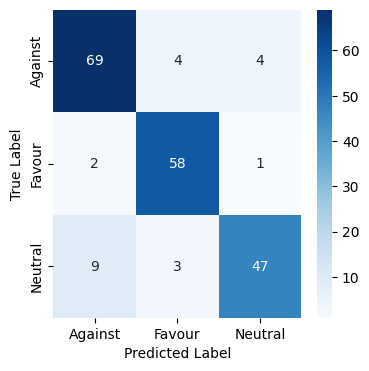

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(df['stance_label'][801:1000], y_pred)

# Create a heatmap visualization of the confusion matrix
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Against', 'Favour', 'Neutral'], yticklabels=['Against', 'Favour', 'Neutral'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X[:801], df['stance_label'][:801], test_size=0.2, random_state=10)

# Train an MLP classifier on the training set
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=100, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X[801:998])
# Evaluate the performance of the trained model on the test set
acc4 = accuracy_score(df['stance_label'][801:998], y_pred)
precision4, recall4, f1_score4, support4 = precision_recall_fscore_support(df['stance_label'][801:998], y_pred)

# Print the evaluation metrics
print('Accuracy:', acc4)
print('Precision:', precision4)
print('Recall:', recall4)
print('F1-Score:', f1_score4)
print('Support:', support4)


Accuracy: 0.5634517766497462
Precision: [0.57142857 0.55932203 0.55319149]
Recall: [0.67532468 0.54098361 0.44067797]
F1-Score: [0.61904762 0.55       0.49056604]
Support: [77 61 59]


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


##RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X[:800], df['stance_label'][:800], test_size=0.2, random_state=10)

# Train a Random Forest classifier on the training set
rf = RandomForestClassifier(n_estimators=100, random_state=10)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X[800:1000])

# Evaluate the performance of the trained model on the test set
acc6 = accuracy_score(df['stance_label'][800:1000], y_pred)
precision6, recall6, f1_score6, support6 = precision_recall_fscore_support(df['stance_label'][800:1000], y_pred)

# Print the evaluation metrics
print('Accuracy:', acc6)
print('Precision:', precision6)
print('Recall:', recall6)
print('F1-Score:', f1_score6)
print('Support:', support6)


Accuracy: 0.4898989898989899
Precision: [0.49275362 0.57142857 0.42465753]
Recall: [0.43589744 0.52459016 0.52542373]
F1-Score: [0.46258503 0.54700855 0.46969697]
Support: [78 61 59]


##Naive Bayes

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
df = pd.read_csv('train_ujjwala.csv')

# Extract the features and target variable
X = df['text']
y = df['stance']

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(sublinear_tf=True)

# Fit and transform the input data
X = vectorizer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
acc5 = accuracy_score(y_test, y_pred)
precision5, recall5, f1_score5, support5 = precision_recall_fscore_support(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', acc5)
print('Precision:', precision5)
print('Recall:', recall5)
print('F1-Score:', f1_score5)
print('Support:', support5)

Accuracy: 0.45
Precision: [0.5        0.41843972 0.5483871 ]
Recall: [0.28       0.75641026 0.23611111]
F1-Score: [0.35897436 0.53881279 0.33009709]
Support: [50 78 72]


In [ ]:
print("Accuracy for Ujjwala jojna",acc1,acc2,acc3,acc4,acc5,acc6)
# print("Accuracy of Gradient Boosting Classifierr",acc3)
# print("Accuracy of AdaBoost Classifier",acc2)
# print("Accuracy of Multi-layer Perceptron Classifier",acc4)
# print("Accuracy of Gaussian Naive Bayes Classifier",acc5)
# print("Accuracy of Random Forest Classifier",acc6)

Accuracy for Ujjwala jojna 0.45 0.5177664974619289 0.883248730964467 0.5634517766497462 0.45 0.4898989898989899


In [ ]:
print("Precision of Bagging Classifier",precision1)
print("Precision of Gradient Boosting Classifierr",precision3)
print("Precision of AdaBoost Classifier",precision2)
print("Precision of Multi-layer Perceptron Classifier",precision4)
print("Precision of Gaussian Naive Bayes Classifier",precision5)
print("Precision of Random Forest Classifier",precision6)

Precision of Bagging Classifier [0.5        0.41843972 0.5483871 ]
Precision of Gradient Boosting Classifierr [0.8625     0.89230769 0.90384615]
Precision of AdaBoost Classifier [0.61538462 0.49230769 0.44776119]
Precision of Multi-layer Perceptron Classifier [0.57142857 0.55932203 0.55319149]
Precision of Gaussian Naive Bayes Classifier [0.5        0.41843972 0.5483871 ]
Precision of Random Forest Classifier [0.49275362 0.57142857 0.42465753]


In [ ]:
print("Recall of Bagging Classifier",recall1)
print("Recall of Gradient Boosting Classifierr",recall3)
print("Recall of AdaBoost Classifier",precision2)
print("Recall of Multi-layer Perceptron Classifier",recall4)
print("Recall of Gaussian Naive Bayes Classifier",recall5)
print("Recall of Random Forest Classifier",recall6)

Recall of Bagging Classifier [0.28       0.75641026 0.23611111]
Recall of Gradient Boosting Classifierr [0.8961039  0.95081967 0.79661017]
Recall of AdaBoost Classifier [0.61538462 0.49230769 0.44776119]
Recall of Multi-layer Perceptron Classifier [0.67532468 0.54098361 0.44067797]
Recall of Gaussian Naive Bayes Classifier [0.28       0.75641026 0.23611111]
Recall of Random Forest Classifier [0.43589744 0.52459016 0.52542373]


In [ ]:
print("F1-Score of Bagging Classifier",f1_score1)
print("F1-Score of Gradient Boosting Classifierr",f1_score3)
print("F1-Score of AdaBoost Classifier",f1_score2)
print("F1-Score of Multi-layer Perceptron Classifier",f1_score4)
print("F1-Score of Gaussian Naive Bayes Classifier",f1_score5)
print("F1-Score of Random Forest Classifier",f1_score6)

F1-Score of Bagging Classifier [0.35897436 0.53881279 0.33009709]
F1-Score of Gradient Boosting Classifierr [0.87898089 0.92063492 0.84684685]
F1-Score of AdaBoost Classifier [0.56338028 0.50793651 0.47619048]
F1-Score of Multi-layer Perceptron Classifier [0.61904762 0.55       0.49056604]
F1-Score of Gaussian Naive Bayes Classifier [0.35897436 0.53881279 0.33009709]
F1-Score of Random Forest Classifier [0.46258503 0.54700855 0.46969697]


In [ ]:
print("Support of Bagging Classifier",support1)
print("Support of Gradient Boosting Classifierr",support3)
print("Support of AdaBoost Classifier",support2)
print("Support of Multi-layer Perceptron Classifier",support4)
print("Support of Gaussian Naive Bayes Classifier",support5)
print("Support of Random Forest Classifier",support6)

Support of Bagging Classifier [50 78 72]
Support of Gradient Boosting Classifierr [77 61 59]
Support of AdaBoost Classifier [77 61 59]
Support of Multi-layer Perceptron Classifier [77 61 59]
Support of Gaussian Naive Bayes Classifier [50 78 72]
Support of Random Forest Classifier [78 61 59]


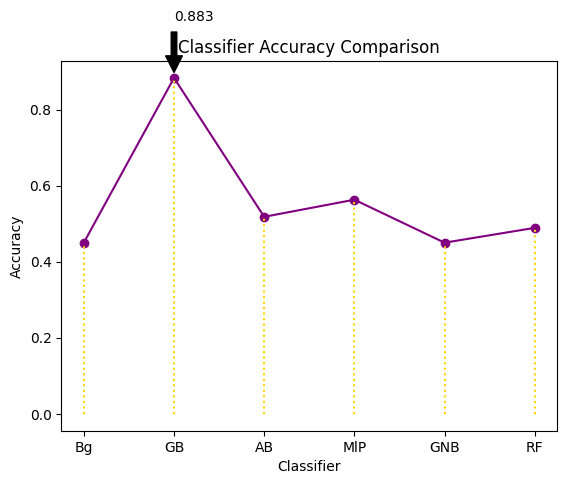

In [ ]:
import matplotlib.pyplot as plt

# Create lists of accuracies
classifiers = ['Bg', 'GB', 'AB', 'MlP', 'GNB', 'RF']
accuracies = [0.45, 0.883, 0.518, 0.563, 0.45, 0.489]

# Find the index of the highest accuracy
max_index = accuracies.index(max(accuracies))

# Create a line graph
plt.plot(classifiers, accuracies, marker='o', color='purple')

# Add dotted lines from classifiers to accuracies
for i in range(len(classifiers)):
    plt.plot([classifiers[i], classifiers[i]], [0, accuracies[i]], linestyle=':', color='gold')
    
# Add an arrow to the highest accuracy
plt.annotate(str(round(accuracies[max_index], 3)), xy=(classifiers[max_index], accuracies[max_index]), xytext=(classifiers[max_index], accuracies[max_index] + 0.15),
             arrowprops=dict(facecolor='black', shrink=0.1))

# Set the chart title and axis labels
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

# Show the plot
plt.show()


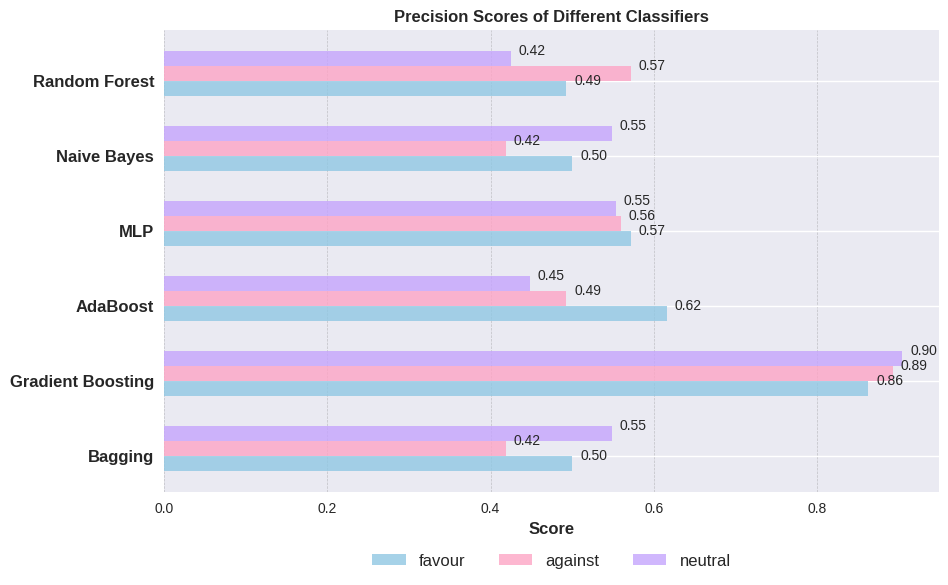

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
classifiers = ['Bagging', 'Gradient Boosting', 'AdaBoost', 'MLP', 'Naive Bayes', 'Random Forest']
precision = [ [0.5    ,    0.41843972, 0.5483871 ], [0.8625  ,   0.89230769, 0.90384615], [0.61538462, 0.49230769, 0.44776119], [0.57142857, 0.55932203, 0.55319149],
[0.5    ,    0.41843972, 0.5483871 ]
, [0.49275362, 0.57142857, 0.42465753]]
colors = ['#90c7e3', '#fda5c5', '#c5a5fd']

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar width
bar_width = 0.2

# Create horizontal bars for each metric
for i, metric in enumerate(['favour', 'against', 'neutral']):
    ax.barh(np.arange(len(classifiers)) + i*bar_width, [p[i] for p in precision], height=bar_width, color=colors[i], alpha=0.8, label=metric)
    
# Set plot properties
ax.set_title('Precision Scores of Different Classifiers', fontweight='bold')
ax.set_yticks(np.arange(len(classifiers)) + bar_width/2)
ax.set_yticklabels(classifiers, fontweight='bold', fontsize=12)
ax.set_xlabel('Score', fontweight='bold', fontsize=12)
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=0)
ax.xaxis.grid(color='gray', linewidth=0.5, linestyle='dashed', alpha=0.4)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False, fontsize=12)


# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add value labels to bars
for i, classifier in enumerate(classifiers):
    for j, metric in enumerate(['favour', 'against', 'neutral']):
        value = precision[i][j]
        ax.text(value+0.01, i+j*bar_width+bar_width/2, f'{value:.2f}', va='center', fontsize=10)

# Show plot
plt.show()


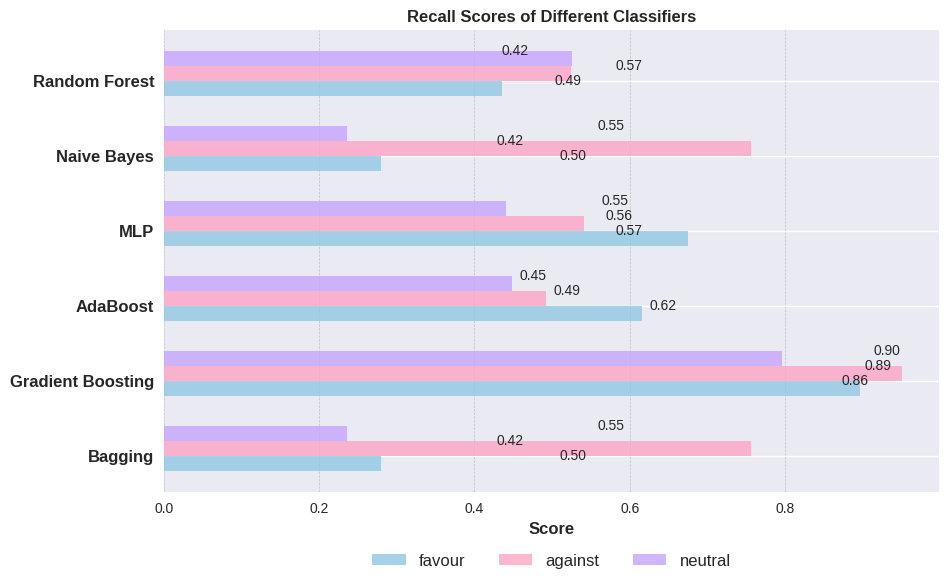

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
classifiers = ['Bagging', 'Gradient Boosting', 'AdaBoost', 'MLP', 'Naive Bayes', 'Random Forest']
recall = [[0.28       ,0.75641026 ,0.23611111],[0.8961039 , 0.95081967, 0.79661017],[0.61538462 ,0.49230769, 0.44776119],[0.67532468 ,0.54098361, 0.44067797],
          [0.28 ,0.75641026, 0.23611111], [0.43589744, 0.52459016, 0.52542373]]
colors = ['#90c7e3', '#fda5c5', '#c5a5fd']

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar width
bar_width = 0.2

# Create horizontal bars for each metric
for i, metric in enumerate(['favour', 'against', 'neutral']):
    ax.barh(np.arange(len(classifiers)) + i*bar_width, [r[i] for r in recall], height=bar_width, color=colors[i], alpha=0.8, label=metric)

# Set plot properties
ax.set_title('Recall Scores of Different Classifiers', fontweight='bold')
ax.set_yticks(np.arange(len(classifiers)) + bar_width/2)
ax.set_yticklabels(classifiers, fontweight='bold', fontsize=12)
ax.set_xlabel('Score', fontweight='bold', fontsize=12)
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=0)
ax.xaxis.grid(color='gray', linewidth=0.5, linestyle='dashed', alpha=0.4)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False, fontsize=12)


# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add value labels to bars
for i, classifier in enumerate(classifiers):
    for j, metric in enumerate(['favour', 'against', 'neutral']):
        value = precision[i][j]
        ax.text(value+0.01, i+j*bar_width+bar_width/2, f'{value:.2f}', va='center', fontsize=10)

# Show plot
plt.show()


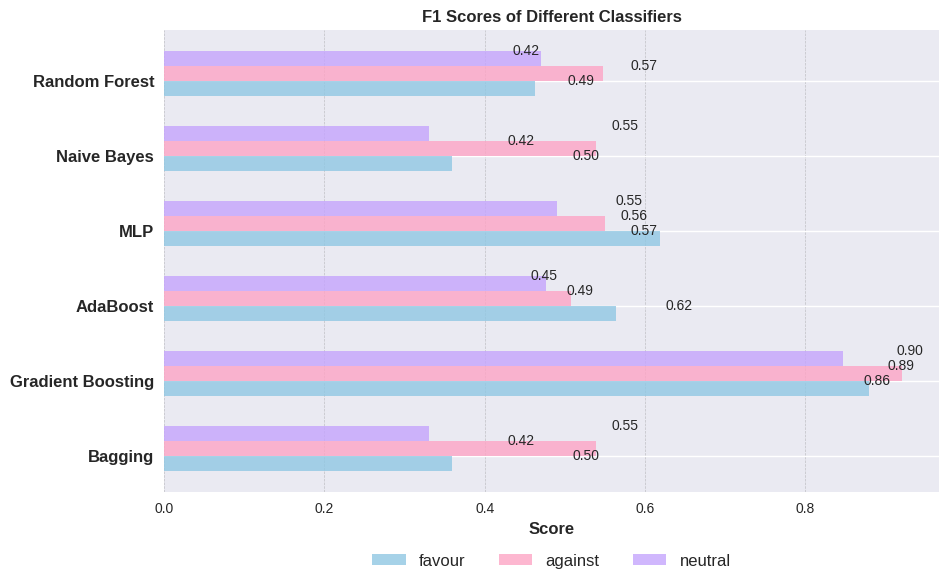

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
classifiers = ['Bagging', 'Gradient Boosting', 'AdaBoost', 'MLP', 'Naive Bayes', 'Random Forest']
f1_score =[ [0.35897436 ,0.53881279, 0.33009709],
 [0.87898089, 0.92063492, 0.84684685],
[0.56338028 ,0.50793651, 0.47619048],
 [0.61904762, 0.55,  0.49056604],
 [0.35897436 ,0.53881279 ,0.33009709],
 [0.46258503 ,0.54700855 ,0.46969697]]
colors = ['#90c7e3', '#fda5c5', '#c5a5fd']

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar width
bar_width = 0.2

# Create horizontal bars for each metric
for i, metric in enumerate(['favour', 'against', 'neutral']):
    ax.barh(np.arange(len(classifiers)) + i*bar_width, [f[i] for f in f1_score], height=bar_width, color=colors[i], alpha=0.8, label=metric)

# Set plot properties
ax.set_title('F1 Scores of Different Classifiers', fontweight='bold')
ax.set_yticks(np.arange(len(classifiers)) + bar_width/2)
ax.set_yticklabels(classifiers, fontweight='bold', fontsize=12)
ax.set_xlabel('Score', fontweight='bold', fontsize=12)
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=0)
ax.xaxis.grid(color='gray', linewidth=0.5, linestyle='dashed', alpha=0.4)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False, fontsize=12)


# Remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add value labels to bars
for i, classifier in enumerate(classifiers):
    for j, metric in enumerate(['favour', 'against', 'neutral']):
        value = precision[i][j]
        ax.text(value+0.01, i+j*bar_width+bar_width/2, f'{value:.2f}', va='center', fontsize=10)

# Show plot
plt.show()


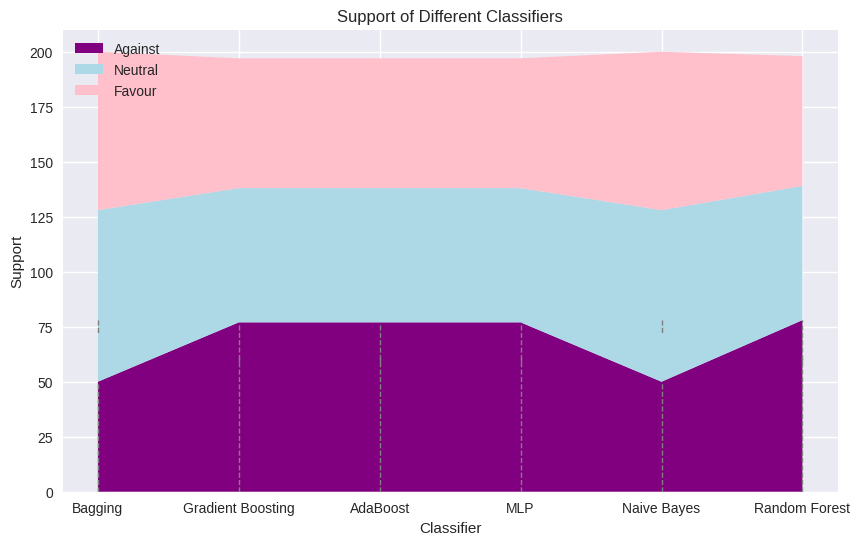

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
classifiers = ['Bagging', 'Gradient Boosting', 'AdaBoost', 'MLP', 'Naive Bayes', 'Random Forest']

stance = ['Against', 'Neutral', 'Favour']
support = np.array([ [50 ,78 ,72]
, [77 ,61 ,59]
, [77, 61, 59]
, [77, 61, 59]
, [50 ,78 ,72]
,[78 ,61 ,59]])

# Create stacked area chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the stacked area chart
ax.stackplot(classifiers, support.T, labels=stance, colors=['purple', 'lightblue', 'pink'])

# Add borders and dotted lines from classifiers to support values
for i in range(len(classifiers)):
    for j in range(len(stance)):
        if j == 0:
            # Plot left border of stacked area chart
            ax.plot([classifiers[i], classifiers[i]], [0, support[i][j]], color='gray', linestyle='--', linewidth=1)
        elif j == len(stance) - 1:
            # Plot right border of stacked area chart
            ax.plot([classifiers[i], classifiers[i]], [support[i][j-1], support[i][j]], color='gray', linestyle='--', linewidth=1)
        else:
            # Plot dotted line for middle of stacked area chart
            y_start = support[i][j-1] + (support[i][j] - support[i][j-1]) / 2
            y_end = support[i][j] - (support[i][j] - support[i][j-1]) / 2
            ax.plot([classifiers[i], classifiers[i]], [y_start, y_end], color='gray', linestyle='--', linewidth=1)

# Set plot properties
ax.set_title('Support of Different Classifiers')
ax.set_xlabel('Classifier')
ax.set_ylabel('Support')
ax.legend(loc='upper left')

# Show plot
plt.show()
